#### COMPANION WORKBOOK

# Project Delivery

Congratulations on making it to the final module of this project! You've come a long way up to this point. You've taken this project from a simple dataset all the way to a high-performing predictive model, and most importantly, you came up with almost all of the mission-critical code on your own!

Now, we'll show you how you can use your model to predict brand new (**raw**) data and package your work together into an executable script.

**Note:** This module does not have a separate Coding Section. Instead, we will be using the exercises below to run all mission-critical code.

#### First, let's import libraries and load the model.
* Tip: For AUROC, if you don't need to actually plot the ROC curve, you can simply import only the <code style="color:steelblue">roc_auc_score()</code> function.

In [82]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Pickle for reading model files
import pickle

# Scikit-Learn's train_test_split function
from sklearn.model_selection import train_test_split

# Area Under ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score


In [83]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

#### Next, load the final model saved from the previous module.

In [84]:
# Load final_model.pkl as model
with open('best_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [85]:
print(type(model))

<class 'sklearn.pipeline.Pipeline'>


#### Before moving on, we also recommend opening up your Companion Workbook for <span style="color:royalblue">Module 2 - ABT Construction</span>.

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 5.1 - Confirm Your Model</span>

One nice and quick sanity check we can do is confirm that our model was saved correctly.

Here's what we'll do:
1. Load the original analytical base table that was used to train the model.
2. Split it into the same training and test sets (with the same random seed).
3. See if we get the same AUROC on the test set as we got in the previous module.

#### A.) But before even doing that, display the model object you loaded earlier. We're confirming a few key details.
* It should be a model <code style="color:steelblue">Pipeline</code>.
* The first step should be a <code style="color:steelblue">StandardScaler</code> preprocessing step.
* The second step should be a <code style="color:steelblue">RandomForestClassifier</code> model.

In [86]:
print(model)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=0.33,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=Fals

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_i...imators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])
</pre>

Great, now let's use it to predict the same test set from the previous module to confirm our model was saved correctly.

#### B.) First, load the same analytical base table that we imported at the beginning of Module 4.

In [87]:
df = pd.read_csv('abt.csv')

df['status'] = df['status_Left'].apply(lambda x: 1 if x==1 else 0)
df = df.drop(['status_Left', 'status_Employed'], axis=1)
X = df.drop(['status'], axis=1)
y = df.status

print(df.status.unique())

[1 0]


Now that you have the dataset, if you split it into training/test sets using the exact same settings and random seed as you used in Module 4, you can perfectly replicate the subsets from Module 4.

#### C.) Next, split it into the exact same training and test sets used in Module 4.
* Remember to first separate the dataframe into separate objects for the target variable (<code style="color:steelblue">y</code>) and the input features (<code style="color:steelblue">X</code>).
* <code style="color:steelblue">test_size=0.2</code> (exactly the same as in Module 4)
* <code style="color:steelblue">random_state=1234</code> (exactly the same as in Module 4)
* <code style="color:steelblue">stratify=df.status</code> (exactly the same as in Module 4)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.status)

#### D.) Finally, use the model to predict <code style="color:steelblue">X_test</code> again.
* Then, print the <code style="color:steelblue">roc_auc_score</code>.
* Remember the difference between <code style="color:steelblue">.predict()</code> and <code style="color:steelblue">.predict_proba()</code>

In [89]:
rf_predict_proba = model.predict_proba(X_test)
rf_predict_proba = [p[1] for p in rf_predict_proba]

In [90]:
print(roc_auc_score(y_test, rf_predict_proba))

0.9915194952019338


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
AUROC: 0.9915201892159932
</pre>

Just now, we loaded our analytical base table and applied our model to it.
* That's all cool, but if new data arrives in the same format as the original **raw data**, can you still apply your model to it? 
* (Wouldn't you need to **first clean the new data the same way and engineer the same features**?)

Let's see for ourselves. Let's load some brand new data that we've never seen before. 

#### E.) Read in <code style="color:crimson">'unseen_raw_data.csv'</code> and save it to a new object called <code>raw_data</code>. Display the first 5 rows.

In [91]:
raw_data = pd.read_csv('unseen_employee_data.csv')
raw_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,228,management,NaN,0.735618,2,NaN,high,0.805661,3.0
1,229,product,NaN,1.000000,4,NaN,low,0.719961,4.0
2,196,sales,1.0,0.557426,4,NaN,low,0.749835,2.0
3,207,IT,NaN,0.715171,3,NaN,high,0.987447,3.0
4,129,management,NaN,0.484818,2,NaN,low,0.441219,3.0


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>department</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>salary</th>
      <th>satisfaction</th>
      <th>tenure</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>228</td>
      <td>management</td>
      <td>NaN</td>
      <td>0.735618</td>
      <td>2</td>
      <td>NaN</td>
      <td>high</td>
      <td>0.805661</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>229</td>
      <td>product</td>
      <td>NaN</td>
      <td>1.000000</td>
      <td>4</td>
      <td>NaN</td>
      <td>low</td>
      <td>0.719961</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>196</td>
      <td>sales</td>
      <td>1.0</td>
      <td>0.557426</td>
      <td>4</td>
      <td>NaN</td>
      <td>low</td>
      <td>0.749835</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>207</td>
      <td>IT</td>
      <td>NaN</td>
      <td>0.715171</td>
      <td>3</td>
      <td>NaN</td>
      <td>high</td>
      <td>0.987447</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>129</td>
      <td>management</td>
      <td>NaN</td>
      <td>0.484818</td>
      <td>2</td>
      <td>NaN</td>
      <td>low</td>
      <td>0.441219</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

In [92]:
raw_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,750.000000,111.0,678.000000,750.000000,12.0,740.000000,740.000000
mean,199.469333,1.0,0.725467,3.794667,1.0,0.626228,3.536486
std,51.115628,0.0,0.170868,1.225224,0.0,0.252133,1.496959
min,52.000000,1.0,0.356003,1.000000,1.0,0.043275,2.000000
25%,156.000000,1.0,0.577446,3.000000,1.0,0.454842,3.000000
50%,198.000000,1.0,0.729100,4.000000,1.0,0.664616,3.000000
75%,246.000000,1.0,0.875163,5.000000,1.0,0.818980,4.000000
max,309.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [93]:
raw_data.filed_complaint.unique()

array([nan,  1.])

In [94]:
raw_data.recently_promoted.unique()

array([nan,  1.])

In [95]:
raw_data.select_dtypes(include=['object']).describe()

,department,salary
count,720,750
unique,12,3
top,sales,low
freq,217,364


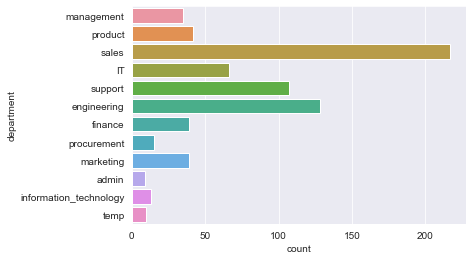

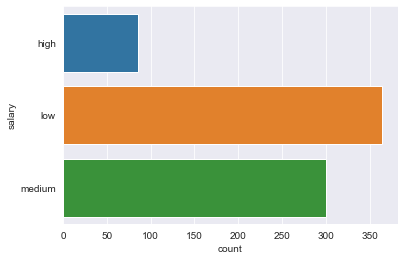

In [96]:
for cat in raw_data.select_dtypes(include=['object']):
    sns.countplot(y=cat, data=raw_data)
    plt.show()

In [97]:
raw_data.isnull().sum()

avg_monthly_hrs        0
department            30
filed_complaint      639
last_evaluation       72
n_projects             0
recently_promoted    738
salary                 0
satisfaction          10
tenure                10
dtype: int64

As you can see, this is in the original format of the raw data, before we cleaned it or engineered features. 
* There are still missing values, features that should be encoded as indicator variables, and many other things to fix.
* Note that it **does not have the target variable**. When you actually apply your model to new observations, they won't have labels (because it's your job to predict them).

#### F.) So let's see what happens when we try to apply our model to this raw dataset. Try to use your model's <code style="color:steelblue">.predict_proba()</code> on this new, raw dataset.

<strong style="color:RoyalBlue">Expected ERROR:</strong>

<pre style="color:crimson">
\---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)

...

ValueError: could not convert string to float: 'low'
</pre>

Well, that's annoying... No problem, we'll fix it in the next exercise.

## <span style="color:RoyalBlue">Exercise 5.2 - Write Pre-Modeling Functions</span>

All we need to do is write a few functions to **convert the raw data to the same format as the analytical base table**.
* That means we need to bundle together our data cleaning steps.
* Then we need to bundle together our feature engineering steps.
* We can skip the exploratory analysis steps because we didn't permanently alter our dataframe then. 
* Conveniently, we already have these steps centralized in <span style="color:royalblue">Module 2: ABT Construction</span>!

Let's start with data cleaning.

#### A.) Write a function called <code style="color:steelblue">clean_data()</code> that bundles together all of the data cleaning steps.
* It's helpful to open up <span style="color:royalblue">Module 2: ABT Construction</span> and go from top to bottom.
* Only include steps that altered your dataframe! You can just copy-paste them here.
* Check the Answer Key to confirm your answer.

In [98]:
def clean_data(df):
    """fix structural errors (NaNs, mispellings in categorical classes)"""
    df.filed_complaint.fillna(0, inplace=True)
    df.recently_promoted.fillna(0, inplace=True)
    df.department.replace('information_technology', 'IT', inplace=True)
    
    """Drop unwanted observations"""
    # drop duplicates
    df.drop_duplicates(inplace=True)
    # 'temps' data do not make sense here since we are concerned with fulltime employees
    df = df[df.department != 'temp']
    
    """Replace missing values ('Missing' for categorical, Flag and Fill for numerical)"""
    df.department.fillna('Missing', inplace=True)
    # flag n fill
    df['last_eval_missing'] = df.last_evaluation.isnull().astype(int)
    df.last_evaluation.fillna(0, inplace=True)
    # flag n fill
    #df['satisfaction_missing'] = df.satisfaction.isnull().astype(int)
    df.satisfaction.fillna(0, inplace=True)
    # flag n fill
    #df['tenure_missing'] = df.tenure.isnull().astype(int)
    df.tenure.fillna(0, inplace=True)
    
    # create indicator features for categorical features
    df = pd.get_dummies(df, columns=['department', 'salary'])
    
    return df

Excellent, now we can clean our raw <code style="color:steelblue">raw_data</code> dataframe the same way.

#### B.) Create a new DataFrame named <code style="color:steelblue">cleaned_data</code> using the function you just wrote.
* Then display its first 5 rows.

In [99]:
cleaned_data = clean_data(raw_data)
cleaned_data.describe()

d:\anaconda\envs\mla\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
d:\anaconda\envs\mla\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_eval_missing,department_IT,department_Missing,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,200.931081,0.144595,0.664685,3.822973,0.016216,0.626228,3.536486,0.083784,0.106757,0.040541,...,0.052703,0.047297,0.052703,0.020270,0.056757,0.293243,0.144595,0.116216,0.485135,0.398649
std,49.777767,0.351929,0.259234,1.205428,0.126392,0.252133,1.496959,0.277251,0.309013,0.197357,...,0.223590,0.212418,0.223590,0.141019,0.231534,0.455557,0.351929,0.320701,0.500117,0.489951
min,97.000000,0.000000,0.000000,2.000000,0.000000,0.043275,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.000000,0.000000,0.542439,3.000000,0.000000,0.454842,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.000000,0.000000,0.693489,4.000000,0.000000,0.664616,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,246.000000,0.000000,0.866991,5.000000,0.000000,0.818980,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,309.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
cleaned_data.isnull().sum()

avg_monthly_hrs           0
filed_complaint           0
last_evaluation           0
n_projects                0
recently_promoted         0
satisfaction              0
tenure                    0
last_eval_missing         0
department_IT             0
department_Missing        0
department_admin          0
department_engineering    0
department_finance        0
department_management     0
department_marketing      0
department_procurement    0
department_product        0
department_sales          0
department_support        0
salary_high               0
salary_low                0
salary_medium             0
dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>department</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>salary</th>
      <th>satisfaction</th>
      <th>tenure</th>
      <th>last_evaluation_missing</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>228</td>
      <td>management</td>
      <td>0.0</td>
      <td>0.735618</td>
      <td>2</td>
      <td>0.0</td>
      <td>high</td>
      <td>0.805661</td>
      <td>3.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>229</td>
      <td>product</td>
      <td>0.0</td>
      <td>1.000000</td>
      <td>4</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.719961</td>
      <td>4.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>196</td>
      <td>sales</td>
      <td>1.0</td>
      <td>0.557426</td>
      <td>4</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.749835</td>
      <td>2.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>207</td>
      <td>IT</td>
      <td>0.0</td>
      <td>0.715171</td>
      <td>3</td>
      <td>0.0</td>
      <td>high</td>
      <td>0.987447</td>
      <td>3.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>129</td>
      <td>management</td>
      <td>0.0</td>
      <td>0.484818</td>
      <td>2</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.441219</td>
      <td>3.0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

As you can see, we no longer have missing values, features that should be encoded as indicator variables, or other structural issues that we fixed during data cleaning.

Now, let's do the same for feature engineering.

#### C.) Next, write a function called <code style="color:steelblue">engineer_features()</code> that compiles all of the feature engineering steps.
* Continue where you left off in <span style="color:Steelblue">Module 2: ABT Construction</span> and continue going from top to bottom.
* Only include steps that altered your dataframe!
* Check the Answer Key to confirm your answer.
* **Do not include any steps used to process the target variable**. We don't have that variable when predicting new, unseen observations.

In [101]:
def engineer_features(df):
    underperformer_mask = ((df.last_evaluation < 0.6) & (df.last_eval_missing == 0))
    unhappy_mask = (df.satisfaction < 0.2)
    overachiever_mask = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7))
    
    df['underperformer'] = underperformer_mask.astype(int)
    df['unhappy'] = unhappy_mask.astype(int)
    df['overachiever'] = overachiever_mask.astype(int)
    
    return df

Perfect, now we can engineer features on the <code style="color:steelblue">cleaned_data</code> DataFrame.

#### D.) Create a new DataFrame named <code style="color:steelblue">augmented_data</code> using the function you just wrote.
* Then display its first 5 rows.
* Remember to pass in <code style="color:steelblue">cleaned_data</code>, not <code style="color:steelblue">raw_data</code>.

In [102]:
augmented_data = engineer_features(cleaned_data)
augmented_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_eval_missing,department_IT,department_Missing,...,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium,underperformer,unhappy,overachiever
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,200.931081,0.144595,0.664685,3.822973,0.016216,0.626228,3.536486,0.083784,0.106757,0.040541,...,0.020270,0.056757,0.293243,0.144595,0.116216,0.485135,0.398649,0.267568,0.089189,0.182432
std,49.777767,0.351929,0.259234,1.205428,0.126392,0.252133,1.496959,0.277251,0.309013,0.197357,...,0.141019,0.231534,0.455557,0.351929,0.320701,0.500117,0.489951,0.442990,0.285209,0.386462
min,97.000000,0.000000,0.000000,2.000000,0.000000,0.043275,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.000000,0.000000,0.542439,3.000000,0.000000,0.454842,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.000000,0.000000,0.693489,4.000000,0.000000,0.664616,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,246.000000,0.000000,0.866991,5.000000,0.000000,0.818980,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,309.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>satisfaction</th>
      <th>tenure</th>
      <th>last_evaluation_missing</th>
      <th>underperformer</th>
      <th>unhappy</th>
      <th>overachiever</th>
      <th>department_IT</th>
      <th>department_Missing</th>
      <th>department_admin</th>
      <th>department_engineering</th>
      <th>department_finance</th>
      <th>department_management</th>
      <th>department_marketing</th>
      <th>department_procurement</th>
      <th>department_product</th>
      <th>department_sales</th>
      <th>department_support</th>
      <th>salary_high</th>
      <th>salary_low</th>
      <th>salary_medium</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>228</td>
      <td>0.0</td>
      <td>0.735618</td>
      <td>2</td>
      <td>0.0</td>
      <td>0.805661</td>
      <td>3.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>229</td>
      <td>0.0</td>
      <td>1.000000</td>
      <td>4</td>
      <td>0.0</td>
      <td>0.719961</td>
      <td>4.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>196</td>
      <td>1.0</td>
      <td>0.557426</td>
      <td>4</td>
      <td>0.0</td>
      <td>0.749835</td>
      <td>2.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>207</td>
      <td>0.0</td>
      <td>0.715171</td>
      <td>3</td>
      <td>0.0</td>
      <td>0.987447</td>
      <td>3.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>129</td>
      <td>0.0</td>
      <td>0.484818</td>
      <td>2</td>
      <td>0.0</td>
      <td>0.441219</td>
      <td>3.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

Awesome. As you can see, this dataframe now has the same structure as the original <code style="color:steelblue">X_train</code>. That means we can make a prediction from it.

#### E.) Predict class probabilities for <code style="color:steelblue">augmented_data</code> using your model.
* Then print the first 5 predictions.

In [108]:
pred_proba = model.predict_proba(augmented_data)
pred_proba = [p[1] for p in pred_proba]

print(pred_proba[:10])

[0.0, 0.06, 0.0, 0.0, 0.94, 0.0, 0.0, 0.0, 0.0, 0.85]


In [109]:
pred = model.predict(augmented_data)
print(pred[:20])

[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[[1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]]
</pre>

No errors. Nice.

## <span style="color:RoyalBlue">Exercise 5.3 - Construct Custom Model Class</span>

Great, now let's package these functions together into a single **model class**. This is a convenient way to keep all of the logic for a given model in one place. Remember how when we were training our model, we imported <code style="color:steelblue">LogisticRegression</code> and <code style="color:steelblue">RandomForestClassifier</code> and <code style="color:steelblue">GradientBoostingClassifier</code>? We called them "algorithms," but they are technically **Python classes**. 

Python classes are structures that allow us to group related code, logic, and functions in one place. Those who remember our earlier discussion on object-oriented programming will have already recognized this concept. In this program, we only need to write some bare bones, very basic classes.

For example, each of those algorithms have the <code style="color:steelblue">fit()</code> and <code style="color:steelblue">predict_proba()</code> functions that allow you to train and apply models, respectively.

#### Custom Class: EmployeeRetentionModel

We're going to construct our own **custom Python class** for our employee retention model. 
* Thankfully, it doesn't need to be nearly as complex as those other algorithm classes because we're not actually using this to train the model. 
* Instead, we already have the model saved in a <code style="color:steelblue">final_model.pkl</code> file.
* We only need to include logic for cleaning data, feature engineering, and predicting new observations.

We'll show you a few pieces of code needed to declare the class, and then we'll have you fill in the rest.

To begin, we **name** our class, like so:

<pre style="color:steelblue">
class EmployeeRetentionModel:
</pre>

We use the <code style="color:steelblue">class</code> keyword to indicate that it's a class.

#### The <code>self.__init__()</code> Function

Then, we define a <code style="color:steelblue">self.\_\_init\_\_()</code> function. 

This is a special function that is automatically run whenever an **instance** of the class is first initialized (you'll see this in action in a few moments). We'll take this chance load our model file. Python will then store our file in the class instance, and you can use it in your other funcitons.


<pre style="color:steelblue">
    def __init__(self, model_location):
        with open(model_location, 'rb') as f:
            self.model = pickle.load(f)
</pre>

A few things to point out:
* Functions in classes must have <code style="color:steelblue">self</code> as the first argument.
* Likewise, when you call them from within the class, you need to prepend <code style="color:steelblue">self.</code> before the function name.
* The second argument, <code style="color:steelblue">model_location</code>, will be the file location of the saved final model.
* <code style="color:steelblue">self.model</code> is called an **instance attribute**. It's a variable that you set and can access elsewhere in the instance.

#### The <code>self.predict_proba()</code>  Function
Next, we'll define a <code style="color:steelblue">predict_proba()</code> function to apply our model to new data.

<pre style="color:steelblue">
    def predict_proba(self, X_new, clean=True, augment=True):
        if clean:
            X_new = self.clean_data(X_new)
        
        if augment:
            X_new = self.engineer_features(X_new)
            
        return X_new, self.model.predict_proba(X_new)
</pre>

A few things to point out:
* We give the option to clean / engineer features or not. This allows us to handle data that has already been cleaned.
* Notice how we are calling <code style="color:steelblue">**self**.clean_data()</code>... When you call class functions, you need to prepend <code style="color:steelblue">self</code>.
* After cleaning and engineering features, we use the <code style="color:steelblue">self.model</code> instance attribute for prediction.
* We also return <code style="color:steelblue">X_new</code> so we have the cleaned and augmented version.

#### The <code>self.clean_data()</code> and <code>self.engineer_features()</code> Functions

Finally, let's add the <code style="color:steelblue">self.clean_data()</code> and <code style="color:steelblue">self.engineer_features()</code> functions. 

We've started you off with the code below.

#### A.) Add the <code style="color:steelblue">self.clean_data()</code> and <code style="color:steelblue">self.engineer_features()</code> to the code below.
* These are the same functions you wrote earlier.
* You can copy-paste, but remember to add <code style="color:steelblue">self</code> as the first argument.

In [119]:
class EmployeeRetentionModel:
    
    def __init__(self, model_location):
        with open(model_location, 'rb') as f:
            self.model = pickle.load(f)
    
    def predict_proba(self, X_new, clean=True, augment=True):
        if clean:
            X_new = self.clean_data(X_new)
        
        if augment:
            X_new = self.engineer_features(X_new)
        
        return X_new, self.model.predict_proba(X_new)
    
    # Add functions here
    def clean_data(self, df):
        """fix structural errors (NaNs, mispellings in categorical classes)"""
        df.filed_complaint.fillna(0, inplace=True)
        df.recently_promoted.fillna(0, inplace=True)
        df.department.replace('information_technology', 'IT', inplace=True)

        """Drop unwanted observations"""
        # drop duplicates
        df.drop_duplicates(inplace=True)
        # 'temps' data do not make sense here since we are concerned with fulltime employees
        df = df[df.department != 'temp']

        """Replace missing values ('Missing' for categorical, Flag and Fill for numerical)"""
        df.department.fillna('Missing', inplace=True)
        # flag n fill
        df['last_eval_missing'] = df.last_evaluation.isnull().astype(int)
        df.last_evaluation.fillna(0, inplace=True)
        # flag n fill
        #df['satisfaction_missing'] = df.satisfaction.isnull().astype(int)
        df.satisfaction.fillna(0, inplace=True)
        # flag n fill
        #df['tenure_missing'] = df.tenure.isnull().astype(int)
        df.tenure.fillna(0, inplace=True)

        # create indicator features for categorical features
        df = pd.get_dummies(df, columns=['department', 'salary'])

        return df

    def engineer_features(self, df):
        underperformer_mask = ((df.last_evaluation < 0.6) & (df.last_eval_missing == 0))
        unhappy_mask = (df.satisfaction < 0.2)
        overachiever_mask = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7))

        df['underperformer'] = underperformer_mask.astype(int)
        df['unhappy'] = unhappy_mask.astype(int)
        df['overachiever'] = overachiever_mask.astype(int)

        return df
    

## <span style="color:RoyalBlue">Exercise 5.4 - Method 1: Jupyter Notebook</span>

In this program, we will cover 2 different ways to deploy your models.
1. Keep it in Jupyter Notebook
2. Port it to an executable script

There are pros and cons of each method. We're going to start with the easiest way to deploy your model: **Keep it in Jupyter Notebook.** Not only is this the easiest way, but this is also our recommended way for Data Scientists and Business Analysts who are personally responsible for maintaining and applying the model.

#### Benefits of Jupyter Notebooks

Keeping the model in Jupyter Notebook has several huge benefits.
* It's seamless to update your model.
* You can perform ad-hoc data exploration and visualization.
* You can write detailed comments and documentation, with images, bullet lists, etc.

We didn't choose Jupyter Notebook for teaching this course just because it's a great interactive environment... we also chose it because it's one of the most popular IDE's among professional data scientists.

#### Applying Your Model Class

If you keep your model in Jupyter Notebook, you can directly use the model class you defined earlier.

First, simply initialize an instance of it:

In [120]:
# Initialize an instance
retention_model = EmployeeRetentionModel('best_rf_model.pkl')

Let's review a few concepts just to make sure they are crystal-clear:
* <code style="color:steelblue">EmployeeRetentionModel</code> is the **class**.
* <code style="color:steelblue">retention_model</code> is an **instance** of the class.
* <code style="color:crimson">'final_model.pkl'</code> is the value for the second argument in <code style="color:steelblue">self.\__init__(self, model_location)</code>

#### Predicting New Data

If implemented correctly, these next three statements should all work.

In [121]:
# Predict raw data
_, pred1 = retention_model.predict_proba(raw_data, clean=True, augment=True)

# Predict cleaned data
_, pred2 = retention_model.predict_proba(cleaned_data, clean=False, augment=True)

# Predict cleaned and augmented data
_, pred3 = retention_model.predict_proba(augmented_data, clean=False, augment=False)

d:\anaconda\envs\mla\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
d:\anaconda\envs\mla\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


By the way, <code style="color:steelblue">\_, pred1 =</code> simply means we're throwing away the first object that's returned (which was <code style="color:steelblue">X_new</code>).

#### Their predictions should all be equivalent.

In [122]:
# Should be true
np.array_equal(pred1, pred2) and np.array_equal(pred2, pred3)

True

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
True
</pre>

## <span style="color:RoyalBlue">Exercise 5.5 - Method 2: Executable Script (Pptional)</span>

However, there will definitely be situations in which Jupyter notebooks are not enough. The most common scenarios are if you need to **integrate** your model with other parts of an application or **automate it**. For these use cases, you can simply package your model into an **executable script**.

#### Benefits of Executable Scripts

You can call these scripts from any command line program. That means you can:
* Host your model on the cloud (like AWS)
* Integrate it as part of a web application (have other parts of the application call the script)
* Or automate it (schedule recurring jobs to run the script)

Implementing each of those use cases is outside the scope of this course, but we'll show you how to actually set up the script, which is the first step for each of those use cases.

#### Script Structure
To make this easier, we've included an example script in the Workbook Bundle called <code style="color:crimson">retention_model.py</code>. Once you open it up (you can open it up in Jupyter browser or in any text editor), you'll see that you've already written most of the code needed, such as:
* The libraries to import
* The custom model class, including the data cleaning, feature engineering, and predict probability functions

All that's left is a little bit of logic at the bottom to handle command line requests.

#### To run the script, you can call it from the command line:

* We're going to assume you know your way around a **command line tool**.
* You need to first navigate to the project folder from the command line.
* If you need help, check out these guides: <a href="http://blog.teamtreehouse.com/introduction-to-the-mac-os-x-command-line" target="_blank">Mac</a>, <a href="http://www.makeuseof.com/tag/a-beginners-guide-to-the-windows-command-line/" target="_blank">Windows</a>

#### Once you've navigated to the project folder, you can call the script like so.

* First, invoke the python command.

<pre style="color:crimson; margin-bottom:30px">
EDS:Module 5 - Project Delivery EDS$ <strong>python</strong> retention_model.py unseen_raw_data.csv predictions.csv final_model.pkl True True
</pre>

* Then, the location of the script.

<pre style="color:crimson; margin-bottom:30px">
EDS:Module 5 - Project Delivery EDS$ python <strong>retention_model.py</strong> unseen_raw_data.csv predictions.csv final_model.pkl True True
</pre>

* Then, the location of the data you'd like to predict.

<pre style="color:crimson; margin-bottom:30px">
EDS:Module 5 - Project Delivery EDS$ python retention_model.py <strong>unseen_raw_data.csv</strong> predictions.csv final_model.pkl True True
</pre>

* Next, the output location of the dataset with predictions.

<pre style="color:crimson; margin-bottom:30px">
EDS:Module 5 - Project Delivery EDS$ python retention_model.py unseen_raw_data.csv <strong>predictions.csv</strong> final_model.pkl True True
</pre>

* Finally, the last three arguments are for <code style="color:steelblue">model_location=</code>, <code style="color:steelblue">clean=</code>, and <code style="color:steelblue">augment=</code> arguments to our custom model class.

<pre style="color:crimson; margin-bottom:30px">
EDS:Module 5 - Project Delivery EDS$ python retention_model.py unseen_raw_data.csv predictions.csv <strong>final_model.pkl True True</strong>
</pre>

#### This saves a new file that includes the predictions. It looks like this:

In [123]:
# Will only work after running the command above
predictions = pd.read_csv('predictions.csv')

predictions.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium,prediction
0,228,0.0,0.735618,2,0.0,0.805661,3.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.00
1,229,0.0,1.000000,4,0.0,0.719961,4.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.02
2,196,1.0,0.557426,4,0.0,0.749835,2.0,0,1,0,...,0,0,0,0,1,0,0,1,0,0.00
3,207,0.0,0.715171,3,0.0,0.987447,3.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.00
4,129,0.0,0.484818,2,0.0,0.441219,3.0,0,1,0,...,1,0,0,0,0,0,0,1,0,1.00


<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>satisfaction</th>
      <th>tenure</th>
      <th>last_evaluation_missing</th>
      <th>underperformer</th>
      <th>unhappy</th>
      <th>overachiever</th>
      <th>department_IT</th>
      <th>department_Missing</th>
      <th>department_admin</th>
      <th>department_engineering</th>
      <th>department_finance</th>
      <th>department_management</th>
      <th>department_marketing</th>
      <th>department_procurement</th>
      <th>department_product</th>
      <th>department_sales</th>
      <th>department_support</th>
      <th>salary_high</th>
      <th>salary_low</th>
      <th>salary_medium</th>
      <th>prediction</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>228</td>
      <td>0.0</td>
      <td>0.735618</td>
      <td>2</td>
      <td>0.0</td>
      <td>0.805661</td>
      <td>3.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>1</th>
      <td>229</td>
      <td>0.0</td>
      <td>1.000000</td>
      <td>4</td>
      <td>0.0</td>
      <td>0.719961</td>
      <td>4.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0.02</td>
    </tr>
    <tr>
      <th>2</th>
      <td>196</td>
      <td>1.0</td>
      <td>0.557426</td>
      <td>4</td>
      <td>0.0</td>
      <td>0.749835</td>
      <td>2.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>3</th>
      <td>207</td>
      <td>0.0</td>
      <td>0.715171</td>
      <td>3</td>
      <td>0.0</td>
      <td>0.987447</td>
      <td>3.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>4</th>
      <td>129</td>
      <td>0.0</td>
      <td>0.484818</td>
      <td>2</td>
      <td>0.0</td>
      <td>0.441219</td>
      <td>3.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>1.00</td>
    </tr>
  </tbody>
</table>

#### If you scroll all the way over to the right, you'll notice predictions for each observation in the <code style="color:steelblue">'prediction'</code> column.

Congratulations for completing the final module for this cornerstone project! As a reminder, here are a few things you did in this module:
* You created confirmed your model was saved correctly.
* You compiled data cleaning and feature engineering functions from code you wrote in past modules.
* You learned how to package everything together in a custom model class.
* And you applied your model to raw data in Jupyter Notebook.

In the next project, you'll get to practice unsupervised learning for the first time. Specifically, the task of **clustering**. As you'll see, even for unsupervised learning, much of this machine learning workflow will remain the same.